# Question 3:

### Importing of Libraries & Loading of the data set into a dataframe

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('telescope_data.csv')

### Performing exploratory data analysis 

#### Step 1: Shape Analysis

In [112]:
df.shape

(19020, 12)

This means that we have 19020 rows and 12 attributes or columns. Out of these 12, one of them is our target column (dependent variable), therefore, we have 11 indepedent parameters.

#### Step 2: Attribute Analysis

In [113]:
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


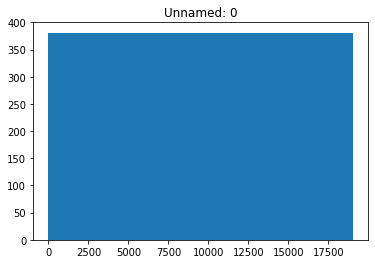

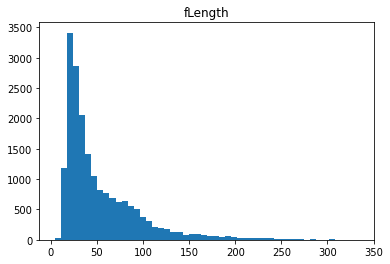

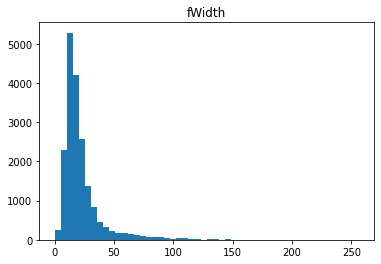

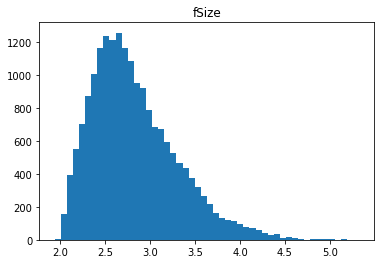

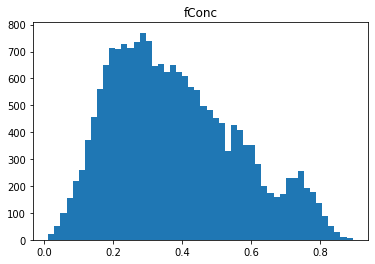

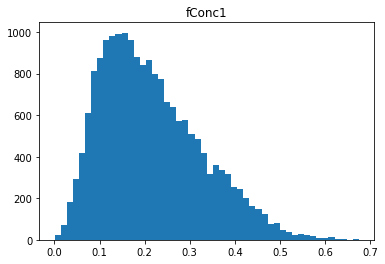

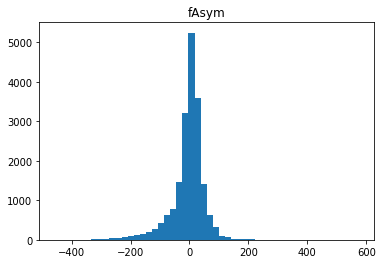

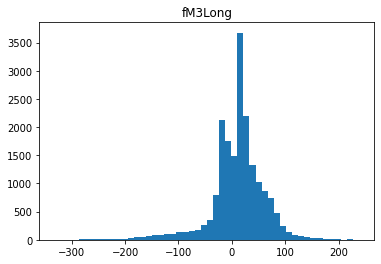

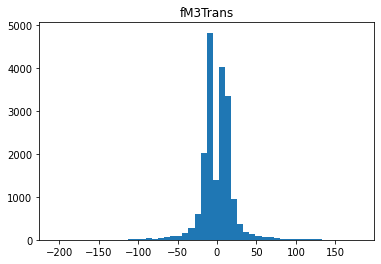

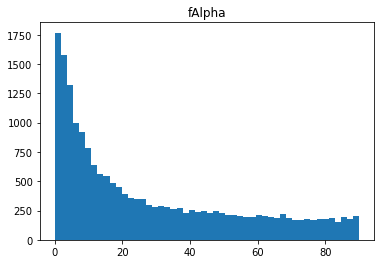

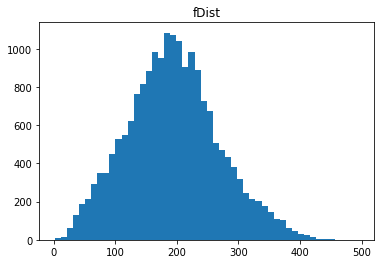

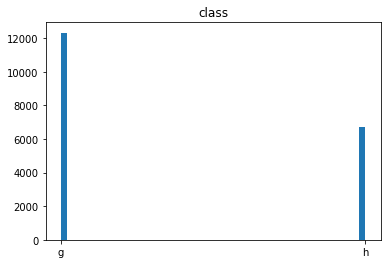

In [115]:
for name in df.columns:
    plt.title(name)
    plt.hist(df[name], bins=50)
    plt.show()

#### Step 3: Missing Value Analysis

In [116]:
pd.isnull(df).sum()

Unnamed: 0    0
fLength       0
fWidth        0
fSize         0
fConc         0
fConc1        0
fAsym         0
fM3Long       0
fM3Trans      0
fAlpha        0
fDist         0
class         0
dtype: int64

Hence, we can note that there are no missing values in the dataset

#### Step 4: Attribute's Statistical Analysis

In [117]:
df.describe()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9509.500000,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,0.000000,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4754.750000,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9509.500000,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14264.250000,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19019.000000,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


#### Step 5: Target's Distribution Analysis

Text(0.5, 1.0, 'Distribution of Different Classes')

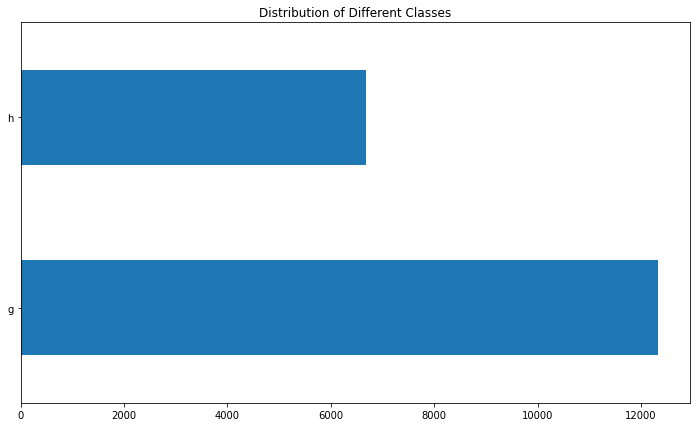

In [118]:
df['class'].value_counts().plot.barh(figsize=(12,7))
plt.title("Distribution of Different Classes")

#### Step 6: Correlation Analysis

<AxesSubplot:>

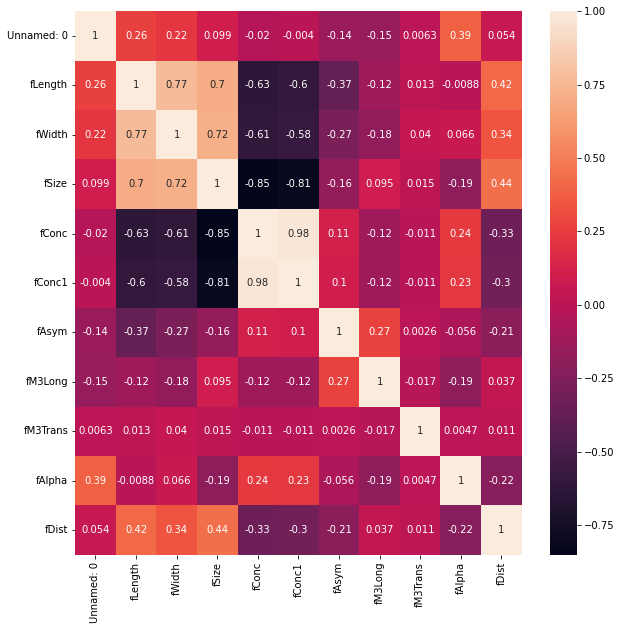

In [119]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color='k',annot=True)

#### Step 7: Pairwise Relationship Analysis

sns.pairplot(df[['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAlpha','fDist']], diag_kind='hist')

#### Step 8: Train Test Split

In [120]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values
#Train and test splitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Data Preprocessing:

Model may struggle to converge before the given number of iterations if the data is not standardized. Scaling your data is highly recommended because the random forest algorithm is sensitive to feature scaling. Remember that the test set must employ the same scaling in order for the results to be significant. There are several ways to normalize data; however, we'll standardize by using the StandardScaler that comes built-in. This will result in Feature Scaling

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We must encode the dependent variable so that its a numerical value. Since there are only 2 classes we can easily make use of LabelEncoder and Encode our class(Target) variable.

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Finding the Optimal Parameters of Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def optimal_rf_param():
    parameters =[]
    for i in range(1,100,10):
        for j in range(1,10,1):
            forest = RandomForestClassifier(n_estimators=i, max_depth=j,random_state=0,criterion='gini')
            forest.fit(X_train,y_train)
            pred = forest.predict(X_test)
            score = accuracy_score(y_test,pred)
            parameters.append((i,j,score))
    optimal = max(parameters,key=lambda x:x[2])
    return optimal

In [124]:
optimal = optimal_rf_param()
opt_num_trees, opt_depth, score = optimal
print("Optimal Depth            : ", opt_depth)
print("Optimal Number of Trees  : ", opt_num_trees)

Optimal Depth            :  1
Optimal Number of Trees  :  1


### Training of the Optimal Random Forest Model

In [125]:
from sklearn.ensemble import RandomForestClassifier
randomf_clsfr = RandomForestClassifier(n_estimators=opt_num_trees, max_depth=opt_depth,random_state=0,criterion='gini')
randomf_clsfr.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=1, random_state=0)

### Evaluation of the Neural Network Model

In [126]:
y_pred = randomf_clsfr.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [127]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[3079    0]
 [   0 1676]]


We discover using this confusion matrix that every test set was appropriately categorised. Due to the absence of false positives and negatives. As we can see, this instantly translates into a model that is 100% accurate.

In [128]:
acc_score = accuracy_score(y_test, y_pred)*100
print("Optimal Random Forest Accuracy: {:.2f}%".format(acc_score))

Optimal Random Forest Accuracy: 100.00%


### Naive Bayes Model

In [129]:
from sklearn import naive_bayes, metrics
model = naive_bayes.BernoulliNB()
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.confusion_matrix(expected_y, predicted_y))

[[2692  387]
 [ 240 1436]]


In [130]:
accuracy_sc = model.score(X_test, y_test)*100
print("Naive Bayes Algorithm Accuracy: {:.2f}%".format(accuracy_sc))

Naive Bayes Algorithm Accuracy: 86.81%


### Comparison

We can see that The Optimal Random Forest had a flawless model accuracy score, with no incorrect classifications. On the other hand, the Naive Bayes algorithm gave us a success rate of about 87%. This indicates that we trained the Random Forest and found the optimal settings so that it outperforms the Nave Bayes algorithm after performing exploratory data analysis and preprocessing on this dataset.